# DETECTING CUSTOMERS SUBSCRIPTION

## 1. DATA IMPORT

### Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from dateutil import parser

### Load dataset

In [2]:
dataset = pd.read_csv('input/appdata10.csv')

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


### Exploratory data analysis (EDA)

In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


## 2. DATA CLEANING

### Convert column type

Let's convert 'hour' column from 'str' to 'int' type. By using slice, we extract 1st and 2nd number:

In [5]:
dataset['hour'] = dataset['hour'].str.slice(1, 3).astype(int)

In [6]:
dataset.sample(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
42011,367346,2013-02-05 21:06:07.738,1,21,67,"joinscreen,Cycle,product_review,Credit3Contain...",45,0,0,1,2013-02-05 21:25:40.609,0
45172,316826,2013-04-30 04:49:34.152,1,4,20,"idscreen,Cycle,Home,ReferralContainer,Credit3C...",85,1,0,1,2013-04-30 04:51:18.978,0
29230,226829,2013-04-05 17:41:51.109,4,17,32,"idscreen,Cycle,Home,Loan2,product_review,produ...",16,0,0,1,2013-04-05 17:43:37.698,0
15746,322333,2013-02-10 19:04:07.206,6,19,28,"Splash,Home,Loan2,CC1,TransactionList,Alerts,R...",15,0,1,0,NaN,1
15134,142729,2013-01-29 00:18:28.933,1,0,29,"joinscreen,Cycle,Credit3Container,ScanPreview,...",14,0,0,1,2013-05-18 18:45:14.071,1


### Remove unnecessary columns

We remove unnecessary columns so that we are left only with numerical columns:

In [7]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


## 3. DATA VISUALIZING

### Plot histogram

We are going to plot every image on one picture, we are going to use a loop. We are going to hav 7 images so we will plot them in 3 rows and 3 columns. Then we are going to specify bins number by vals variable. We will use 'unique' function to have exactly the same number of bins as the number of unique values:

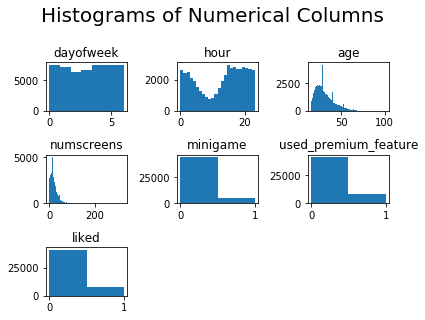

In [8]:
plt.suptitle('Histograms of Numerical Columns', fontsize = 20, y = 1.1)

for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])
    
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins = vals)
    plt.tight_layout()

Remarks:
- day of week has pretty even distribution, no particular day of week seem to have influence on if User install the app
- we have a substantial drop around 10 but note that those hours are in UTC format and the data are from US time zone so those hours are in reality in the middle of the night
- age seem to have even distribution apart from 2-3 jumps we have around 30, 40 and 52
- number of screens seem to be also evenly distributed apart from one outlier
- we may observe that not so many people played minigame, similar with using premium feature and liked/ not liked

## 4. CORRELATION WITH RESPONSE

We are going to use corrwith function which shows the correlation between all the fields in this dataframe with a list that we specify as an argument, in this case that would be 'enrolled':

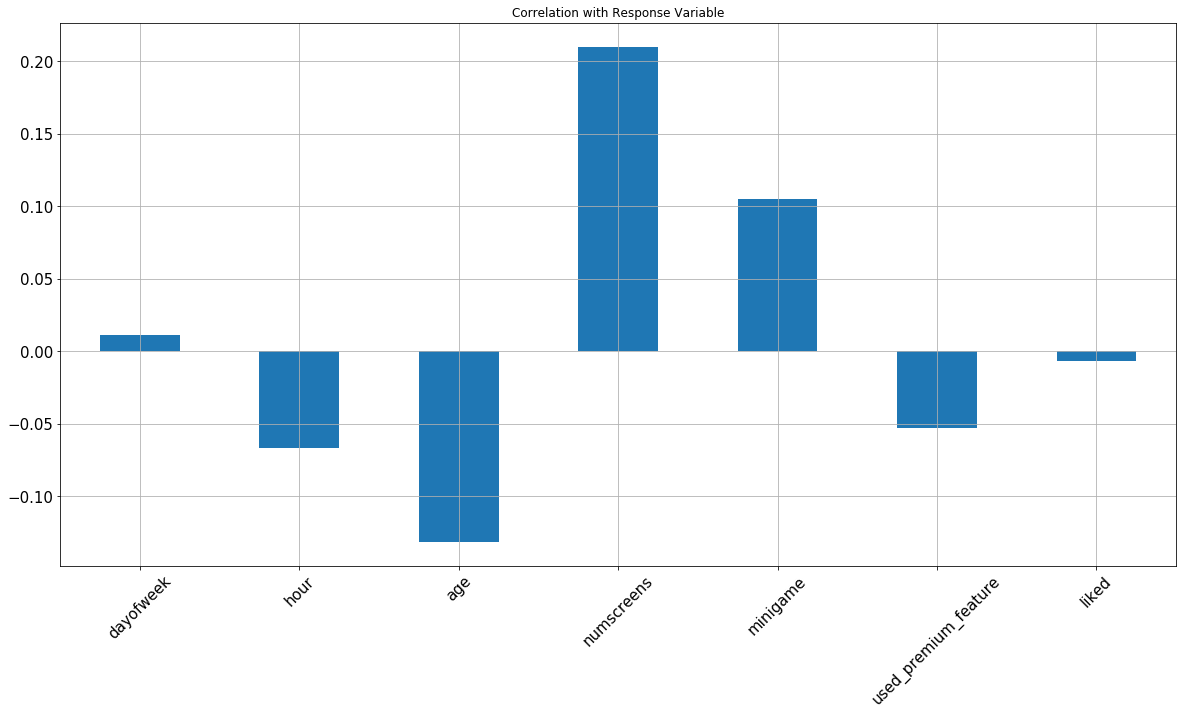

In [9]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20,10),
                                            title = 'Correlation with Response Variable',
                                            fontsize = 15, rot = 45,
                                            grid = True);

Remarks:
- day of the week seems to be correlated with the response variable meaning that the later the day of the week, the more possible to enroll but this relation is very small
- the earlier it is, the smaller the age is, the more likely to enroll
- the more screens we saw, the more likely it is to enroll
- if we are likely to play a minigame, the more likely it is to enroll
- the more we used premium features, the less likely to enroll
- liked is not that strongly correlated with response variable

## 5. CORRELATION MATRIX

Now we are going to plot a correlation matrix between every individual field. Let's mask upper triangle of the matrix as it is symmetric:

In [10]:
sns.set(style="white", font_scale=2)

### Compute the correlation matrix

In [11]:
corr = dataset2.corr()

### Generate a mask for the upper triangle

In [12]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

### Draw the heatmap with the mask and correct aspect ratio

(7.0, 0.0)

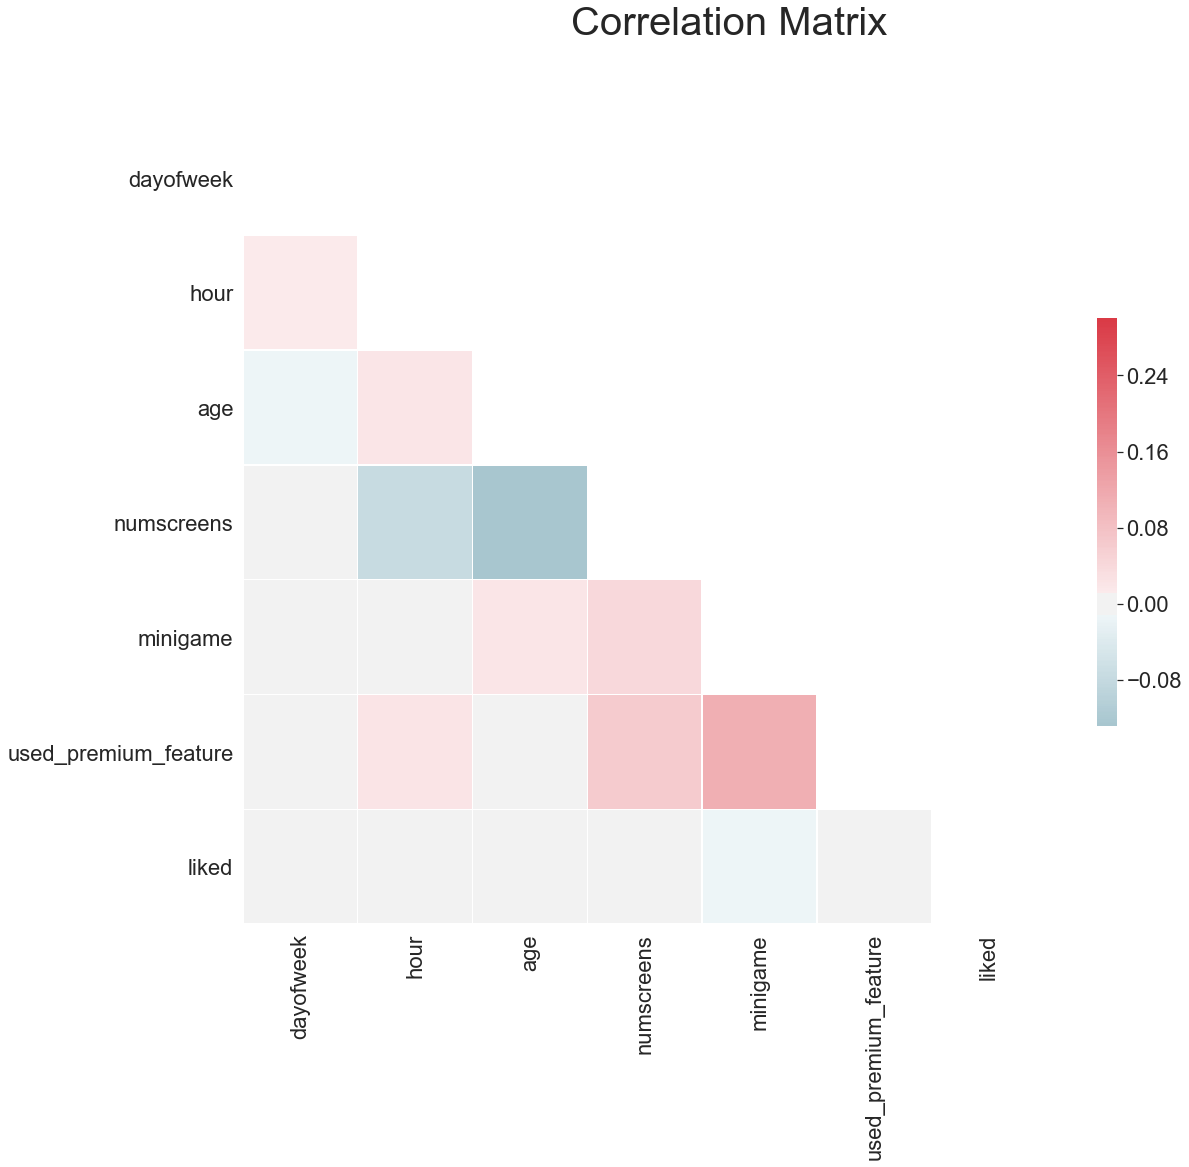

In [13]:
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": 0.5});
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Remarks:
- if colour between specific features is (almost) white, there is very little or no correlation between those features
- there is a positive correlation between those who played minigame and those who used premium features
- age and number of screens seem to be strongly correlated in a negative sense, i.e. the older the person is, the less number of screens he sees
- it doesn't seem there is a linear dependence between the features so we can conclude that the features are independent

## 6. FEATURE ENGINEERING

Feature engineering is the process of selecting and transforming variables when creating a predictive model using machine learning or statistical modeling.

### Formatting date columns

Let's check first data types we have:

In [14]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [15]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [16]:
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]

In [17]:
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]

We can now observe that our objects are now datetime objects:

In [18]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

### Selecting time for response

Now we will need to calculate the difference between those days and set the type to be displayed in hours:

In [19]:
dataset['difference'] = (dataset['enrolled_date'] - dataset['first_open']).astype('timedelta64[h]')

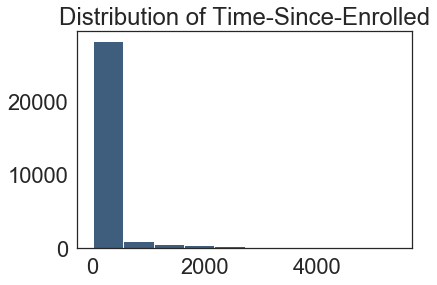

In [20]:
plt.hist(dataset['difference'].dropna(), color = '#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled')
plt.show;

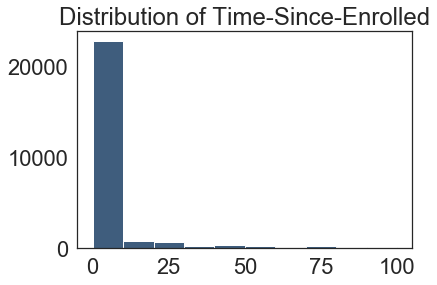

In [21]:
plt.hist(dataset['difference'].dropna(), color = '#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Enrolled')
plt.show;

Let's set the limit for enrollments to be up to 48 hours:

In [22]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

Let's drop the columns we don't need anymore:

In [23]:
dataset = dataset.drop(columns=['difference', 'enrolled_date', 'first_open'])

### Load top screens

Let's now read screens that were most popular among the Users:

In [24]:
top_screens = pd.read_csv('input/top_screens.csv').top_screens.values

In [25]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

### Mapping screens to fields

Let's add ',' at the end of every screen_list column:

In [26]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

Now we are going to iterate over top_screens. The loop creates columns with top_screen names:

In [27]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int) #convert to integer, otherwise we will get True/False
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+',','') #remove used top_screen from screen_list

As we are left with other screen types also, we are going to add all of those into "Other" column. We will indicate how many other screens we have. As we have added ',' at the end, it is enough if we calculate number of commas:

In [28]:
dataset['Other'] = dataset.screen_list.str.count(',')

In [29]:
dataset = dataset.drop(columns = 'screen_list')

### Funnels

Now we are going to work with funnels. Funnels are a group of screens that belong to the same set.

In [30]:
savings_screens = [
    'Saving1',
    'Saving2',
    'Saving2Amount',
    'Saving4',
    'Saving5',
    'Saving6',
    'Saving7',
    'Saving8',
    'Saving9',
    'Saving10'
]
dataset['SavingsCount'] = dataset[savings_screens].sum(axis = 1)
dataset = dataset.drop(columns = savings_screens)

cm_screens = [
    'Credit1',
    'Credit2',
    'Credit3',
    'Credit3Container',
    'Credit3Dashboard'
]
dataset['CMCount'] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = [
    'CC1',
    'CC1Category',
    'CC3'
]
dataset['CCCount'] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = [
    'Loan',
    'Loan2',
    'Loan3',
    'Loan4'
]
dataset['LoansCount'] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [31]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [32]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [33]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingsCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [34]:
dataset.to_csv('new_appdata10.csv', index = False)

## 7. DATA PREPROCESSING

Import data:

In [35]:
dataset = pd.read_csv('input/new_appdata10.csv')

### Splitting independent and response variables

Let's split response variable from independent features:

In [36]:
X = dataset.drop(columns = 'enrolled')

In [37]:
y = dataset['enrolled']

### Splitting the dataset into the training set and test set

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Removing identifiers

For training and testing, user id is not needed in our model, but at the end we are going to associate the prediction to the user it came from, so let's save it away before removing it:

In [40]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')

In [41]:
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

### Feature scaling

The next step will be feature scaling

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc_X = StandardScaler()

StandardScaler returns numpy array. The problem with that is that it looses the column names and index. Index is identifying each set of fields to the user and columns build our models. So we are going to save scaled part into a different dataframe:

In [44]:
for n_train,v_train in X_train.items():
    if v_train.dtype == "object":
        X_train[n_train] = v_train.factorize()[0]

In [45]:
for n_test,v_test in X_test.items():
    if v_test.dtype == "object":
        X_test[n_test] = v_test.factorize()[0]

In [46]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))

We are going only to transform scaled X cause it was already fitted to the training set:

In [47]:
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [48]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [49]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [50]:
X_train = X_train2
X_test = X_test2

## 8. MODEL BUILDING

### Fitting model to the training set

In [51]:
from sklearn.linear_model import LogisticRegression

Penalty l1 is going to change the model from regular logistic regression model to l1 regularization. We do it because, as mentioned above, screens can be correlated one to another. Maybe one screen is next to the other and maybe if you click on one screen, then you will click on the other. We address a lot of this correlations while creating the funnel features that incorporate all the screens that belong to the same set but there might be other correlations that exist even though the screens does not belong to the same set. What l1 penalty does, it penalizes those cases in which one particular feature gets a very big coefficient. This is important in the model when we are working with app screens.

In [52]:
classifier = LogisticRegression(random_state = 0, penalty = 'l1')

In [53]:
classifier.fit(X_train, y_train)

C:\Users\annak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\annak\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting test set

In [54]:
y_pred = classifier.predict(X_test)

### Evaluating results

Let's evaluate if our predictions were accurate or not

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

### Print confusion matrix

In [56]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3741   38]
 [   1 6220]]


### Print heatmap

(2.0, 0.0)

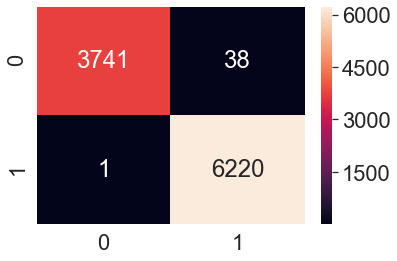

In [57]:
ax = sns.heatmap(cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Print classification report

In [58]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9997    0.9899    0.9948      3779
           1     0.9939    0.9998    0.9969      6221

    accuracy                         0.9961     10000
   macro avg     0.9968    0.9949    0.9958     10000
weighted avg     0.9961    0.9961    0.9961     10000



We managed to improve a bit our model - now only 39 samples are misclassified. The good point is that only 1 out of 39 elements that are misclassified are an error type 2.

In [59]:
print('Test Data Accuracy: %0.4f' % accuracy_score(y_test, y_pred))

Test Data Accuracy: 0.9961


In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

C:\Users\annak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\annak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\annak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\annak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\annak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [62]:
print('Logistic Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

Logistic Accuracy: 0.996 (+/- 0.022)


### Formatting final results

In [63]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()

In [64]:
final_results['predicted_results'] = y_pred

In [65]:
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,1
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
